****
# Introduction #
****
**The CIFAR-10 dataset consists of images categorized into 10 distinct classes. The objective of this notebook is to implement a Convolutional Neural Network (CNN) to accurately classify these images into their respective classes.**

****
# Reading and Displaying the dataset #
****

In [1]:
# importing
import pandas as pd
import numpy as np

import os

import keras as k

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Traversing the directory to print the full paths of every file present
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [3]:
# Loading the datasets 
(tr,trl),(te,tel)=k.datasets.cifar10.load_data()

In [4]:
# Let us look at the shapes of out training and testing sets
print(tr.shape,trl.shape)
print(te.shape,tel.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
# Storing the 10 classes present in the dataset to help during testing and evaluating stage
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

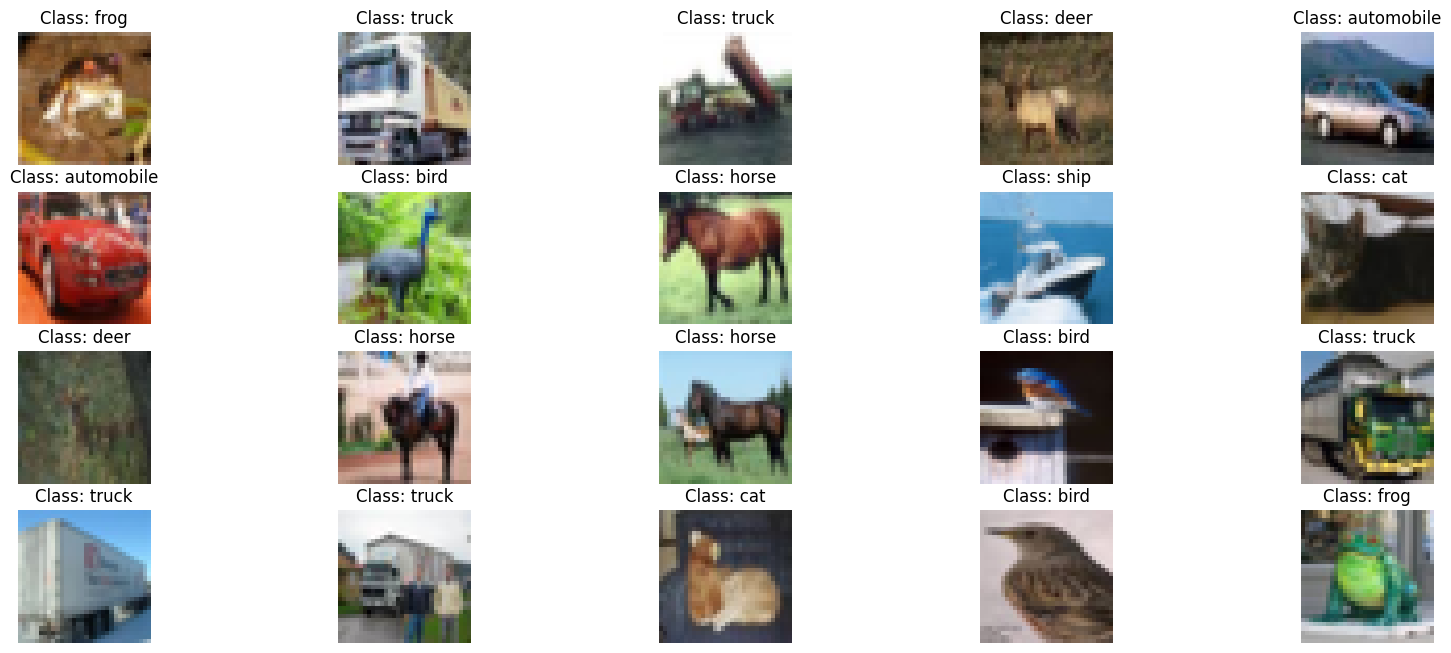

In [6]:
# Displaying some of the images

plt.figure(figsize=(20, 10))

for i, (image, label) in enumerate(zip(tr[:20], trl[:20])):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image)  # Display the image
    plt.title(f"Class: {classes[label[0]]}")
    plt.axis('off')


****
# Data Augmentation #
****

In [7]:
# importing

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [8]:
trl= to_categorical(trl, num_classes=10)  
tel=to_categorical(tel, num_classes=10)  

In [9]:
# Augmentation and Preprocessing for training set
datagen=ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
# Preprocessing for Testing set (Only Rescaling)
datagente=ImageDataGenerator(
    rescale=1./255
)

In [10]:
# Fitting the generator on the training data
datagen.fit(tr)
# Generating Augmented Images
tr_gen=datagen.flow(tr, trl, batch_size=32)

In [11]:
# Fitting the generator on the testing data
datagente.fit(te)
te_gen=datagente.flow(te,tel,batch_size=32)

****
# Convulational Neural Network #
****

In [12]:
# importing

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import layers, models

In [13]:
r=ReduceLROnPlateau(monitor='val_accuracy',patience=10,factor=0.001)

In [14]:
mod=models.Sequential()

# CNN Layer 1
mod.add(layers.Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
mod.add(layers.Activation('relu'))
mod.add(layers.BatchNormalization())

# CNN Layer 2
mod.add(layers.Conv2D(256,(3,3),padding='same'))
mod.add(layers.Activation('relu'))
mod.add(layers.BatchNormalization())
mod.add(layers.MaxPooling2D())

# CNN Layer 3

mod.add(layers.Conv2D(64,(3,3),padding='same'))
mod.add(layers.Activation('relu'))
mod.add(layers.BatchNormalization())
mod.add(layers.MaxPooling2D())
mod.add(layers.Dropout(0.3))

# CNN Layer 4

mod.add(layers.Conv2D(128,(3,3),padding='same'))
mod.add(layers.Activation('relu'))
mod.add(layers.BatchNormalization())
mod.add(layers.Dropout(0.3))

# CNN Layer 5

mod.add(layers.Conv2D(128,(3,3),padding='same'))
mod.add(layers.Activation('relu'))
mod.add(layers.BatchNormalization())
mod.add(layers.MaxPooling2D())
mod.add(layers.Dropout(0.5))

# Flatten Layer

mod.add(layers.Flatten())

# Dense Layer 1
mod.add(layers.Dense(1024,activation='relu'))
mod.add(layers.Dropout(0.3))
# Dense Layer 2
mod.add(layers.Dense(512,activation='relu'))
mod.add(layers.Dropout(0.5))
# Dense Layer 3
mod.add(layers.Dense(128,activation='relu'))
mod.add(layers.Dropout(0.5))


# Output layer
mod.add(layers.Dense(10,activation='softmax'))

mod.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,659,466 (13.96 MB)

 Trainable params: 3,657,802 (13.95 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [15]:
opt=k.optimizers.Adam(learning_rate=0.001)
mod.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
modh = mod.fit(tr_gen, epochs=50, validation_data=te_gen, callbacks=[ r], batch_size=32)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733923082.818417    1584 service.cc:145] XLA service 0x7acf04002480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733923082.818511    1584 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  10/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.1163 - loss: 5.6811

I0000 00:00:1733923093.778736    1584 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - accuracy: 0.1739 - loss: 2.3521 - val_accuracy: 0.3375 - val_loss: 1.6544 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3152 - loss: 1.8016 - val_accuracy: 0.3486 - val_loss: 1.8516 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4002 - loss: 1.6245 - val_accuracy: 0.5368 - val_loss: 1.2938 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4883 - loss: 1.4556 - val_accuracy: 0.5134 - val_loss: 1.3668 - learning_rate: 0.0010
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5385 - loss: 1.3365 - val_accuracy: 0.5499 - val_loss: 1.4443 - learning_rate: 0.0010
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5777 - loss: 1.2432 - val_accuracy: 0.6156 - val_loss: 1.0708 - learning_rate: 0.0010
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6017 

****
# Evaluation #
****

In [16]:
# importing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

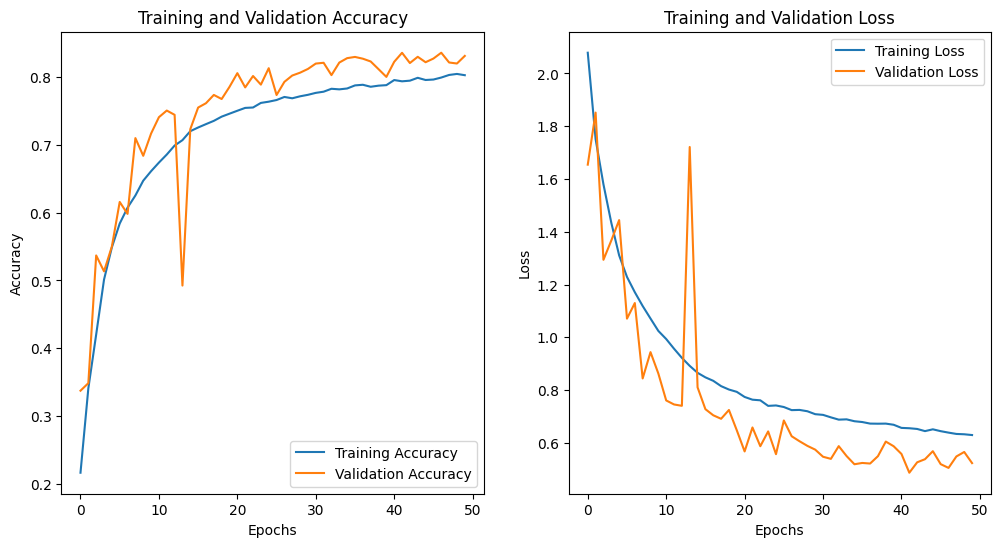

Accuracy Score =  0.8355000019073486


In [20]:
history = modh

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

****
# Feedback and Suggestions #
****

**Kindly Upvote if you found this notebook helpful or if you liked it :)**

**Please provide feedback and suggestions to improve this notebook**